In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import ROOT

%matplotlib inline
plt.style.use("ggplot")

Welcome to JupyROOT 6.08/06


In [2]:
def readInData(rootFile,treeName,isGen):
    dataFile=ROOT.TFile.Open(rootFile)
    dataTree=dataFile.Get(treeName)
    nentries=dataTree.GetEntries()
    #print("nentries {0}".format(nentries))
    Mpi0etas=np.zeros(nentries)
    cosThetaGJs=np.zeros(nentries)
    weights=np.zeros(nentries)
    for ievent in range(nentries):
        dataTree.GetEntry(ievent)
        Mpi0etas[ievent]=dataTree.Mpi0eta
        cosThetaGJs[ievent]=dataTree.cosTheta_eta_gj
        if not isGen:
            weights[ievent]=dataTree.weightASBS
    return Mpi0etas, cosThetaGJs, weights

In [3]:
from loadCfg import loadCfg
params=loadCfg()
nBS=params["NUMBER_SEEDS"]
nBS

5

## Study acc distributions

In [ ]:
# rootFile="studyAcceptance/veryBasicCuts/deg000_etapi_acc_testing_treeFlat_DSelector.root"
# treeName="deg000_etapi_acc_testing_tree_flat"
# Mpi0etas_acc_minimal, cosThetaGJ_acc_minimal, weights_acc_minimal = readInData(rootFile,treeName,False)

In [ ]:
rootFile="studyAcceptance/noCuts/deg000_etapi_acc_testing_treeFlat_DSelector.root"
treeName="deg000_etapi_acc_testing_tree_flat"
Mpi0etas_acc_none, cosThetaGJ_acc_none, weights_acc_none = readInData(rootFile,treeName,False)

In [32]:
rootFile="studyAcceptance/allCuts/deg000_etapi_acc_testing_treeFlat_DSelector.root"
treeName="deg000_etapi_acc_testing_tree_flat"
Mpi0etas_acc, cosThetaGJ_acc, weights_acc = readInData(rootFile,treeName,False)

In [ ]:
fig,axes=plt.subplots(3,3,figsize=(14,9.5))
axes=axes.flatten()
###### No cuts
axes[0].hist(Mpi0etas_acc_none,bins=75,label="None")
axes[0].set_title("ACC - No Cuts")
axes[0].set_xlabel("Mpi0eta (GeV)")
axes[0].set_ylabel("Intensity")
axes[0].hist(Mpi0etas_acc_none,bins=75,weights=weights_acc_none,label="Weighted")
axes[0].legend()

axes[1].hist2d(Mpi0etas_acc_none,cosThetaGJ_acc_none,bins=[75,75])#,weights=weights_acc_none)
axes[1].set_xlabel("Mpi0eta (GeV)")
axes[1].set_ylabel("CosTheta GJ")
axes[1].set_title("ACC - No Cuts")
axes[1].grid(False)

axes[2].hist2d(Mpi0etas_acc_none,cosThetaGJ_acc_none,bins=[75,75],weights=weights_acc_none)
axes[2].set_xlabel("Mpi0eta (GeV)")
axes[2].set_ylabel("CosTheta GJ")
axes[2].set_title("ACC - No Cuts - Weighted")
axes[2].grid(False)

###### minimal cuts
axes[3].hist(Mpi0etas_acc_minimal,bins=75,label="None")
axes[3].set_title("ACC - UE/Chi/Ellipse")
axes[3].set_xlabel("Mpi0eta (GeV)")
axes[3].set_ylabel("Intensity")
axes[3].hist(Mpi0etas_acc_minimal,bins=75,weights=weights_acc_minimal,label="Weighted")
axes[3].legend()

axes[4].hist2d(Mpi0etas_acc_minimal,cosThetaGJ_acc_minimal,bins=[75,75])#,weights=weights_acc_minimal)
axes[4].set_xlabel("Mpi0eta (GeV)")
axes[4].set_ylabel("CosTheta GJ")
axes[4].set_title("ACC - UE/Chi/Ellipse")
axes[4].grid(False)

axes[5].hist2d(Mpi0etas_acc_minimal,cosThetaGJ_acc_minimal,bins=[75,75],weights=weights_acc_minimal)
axes[5].set_xlabel("Mpi0eta (GeV)")
axes[5].set_ylabel("CosTheta GJ")
axes[5].set_title("ACC - UE/Chi/Ellipse - Weighted")
axes[5].grid(False)

###### all cuts
axes[6].hist(Mpi0etas_acc,bins=75,label="None")
axes[6].set_title("ACC - ALL")
axes[6].set_xlabel("Mpi0eta (GeV)")
axes[6].set_ylabel("Intensity")
axes[6].hist(Mpi0etas_acc,bins=75,weights=weights_acc,label="Weighted")
axes[6].legend()

axes[7].hist2d(Mpi0etas_acc,cosThetaGJ_acc,bins=[75,75])#,weights=weights_acc_minimal)
axes[7].set_xlabel("Mpi0eta (GeV)")
axes[7].set_ylabel("CosTheta GJ")
axes[7].set_title("ACC - ALL")
axes[7].grid(False)

axes[8].hist2d(Mpi0etas_acc,cosThetaGJ_acc,bins=[75,75],weights=weights_acc)
axes[8].set_xlabel("Mpi0eta (GeV)")
axes[8].set_ylabel("CosTheta GJ")
axes[8].set_title("ACC - ALL - Weighted")
axes[8].grid(False)


plt.tight_layout()

## Compare dat/acc/gen

In [36]:
rootFile="a0a2a2pi1_polarized/deg090_onlypi1_gen_trees_DSelector.root"
treeName="Thrown_Tree"
# rootFile="a0a2a2pi1_polarized/deg090_a0a2a2pi1_largerpi1_dat_treeFlat_DSelector.root"
# treeName="deg090_a0a2a2pi1_largerpi1_dat_tree_flat"
Mpi0etas_dat, cosThetaGJ_dat, weights_dat = readInData(rootFile,treeName,True)

In [ ]:
rootFile="studyAcceptance/allCuts/deg000_etapi_acc_testing_treeFlat_DSelector.root"
treeName="deg000_etapi_acc_testing_tree_flat"
Mpi0etas_acc, cosThetaGJ_acc, weights_acc = readInData(rootFile,treeName,False)

In [30]:
rootFile="studyAcceptance/gen/deg000_etapi_gen_trees_DSelector.root"
treeName="Thrown_Tree"
Mpi0etas_gen, cosThetaGJ_gen, weights_gen = readInData(rootFile,treeName,True)

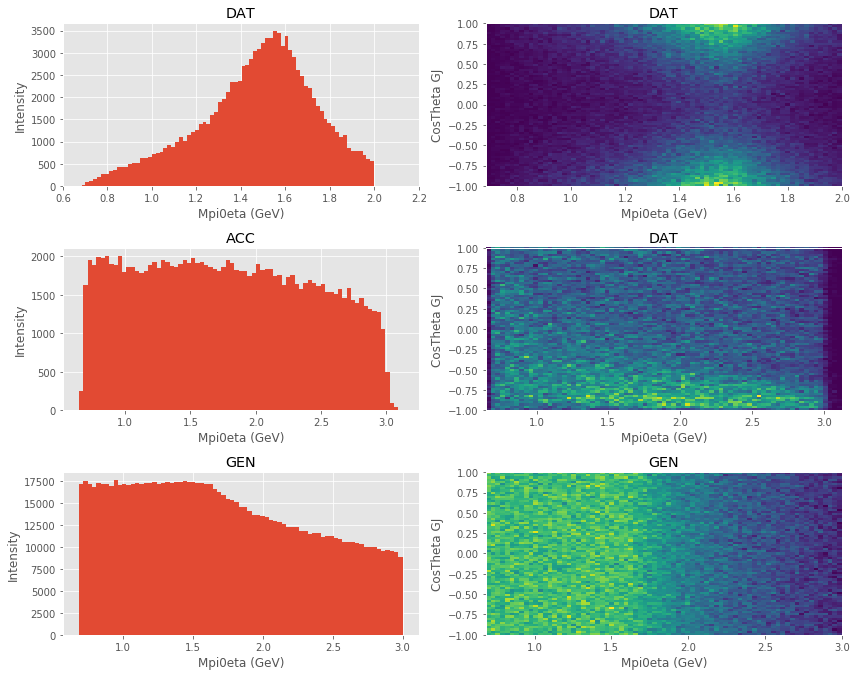

In [37]:
fig,axes=plt.subplots(3,2,figsize=(12,9.5))
axes=axes.flatten()

###### DAT
axes[0].set_xlim(0.6,2.2)
axes[0].hist(Mpi0etas_dat,bins=75)
axes[0].set_title("DAT")
axes[0].set_xlabel("Mpi0eta (GeV)")
axes[0].set_ylabel("Intensity")

axes[1].hist2d(Mpi0etas_dat,cosThetaGJ_dat,bins=[75,75])
axes[1].set_xlabel("Mpi0eta (GeV)")
axes[1].set_ylabel("CosTheta GJ")
axes[1].set_title("DAT")
axes[1].grid(False)

###### ACC
axes[2].hist(Mpi0etas_acc,bins=75)
axes[2].set_title("ACC")
axes[2].set_xlabel("Mpi0eta (GeV)")
axes[2].set_ylabel("Intensity")

axes[3].hist2d(Mpi0etas_acc,cosThetaGJ_acc,bins=[75,75])#,weights=weights_acc)
axes[3].set_xlabel("Mpi0eta (GeV)")
axes[3].set_ylabel("CosTheta GJ")
axes[3].set_title("DAT")
axes[3].grid(False)

###### GEN
axes[4].hist(Mpi0etas_gen,bins=75)
axes[4].set_title("GEN")
axes[4].set_xlabel("Mpi0eta (GeV)")
axes[4].set_ylabel("Intensity")

axes[5].hist2d(Mpi0etas_gen,cosThetaGJ_gen,bins=[75,75])
axes[5].set_xlabel("Mpi0eta (GeV)")
axes[5].set_ylabel("CosTheta GJ")
axes[5].set_title("GEN")
axes[5].grid(False)

plt.tight_layout()

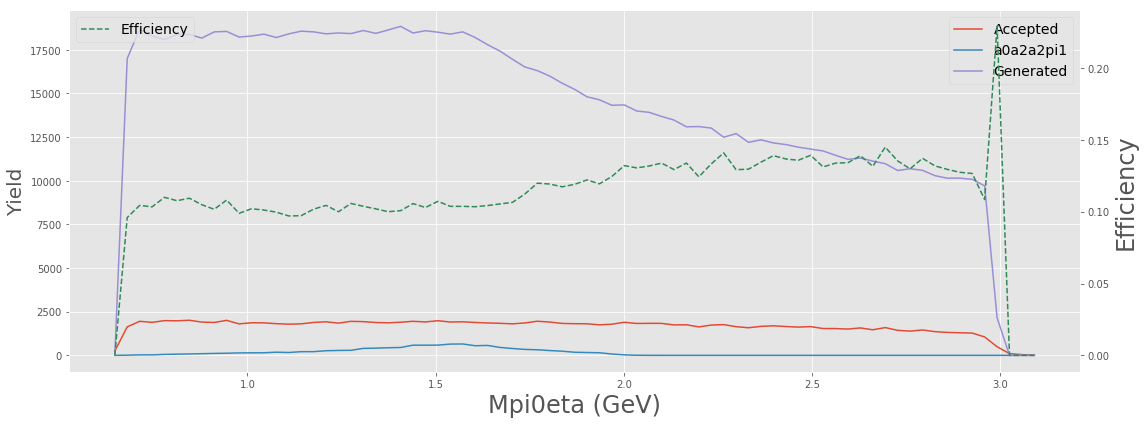

In [34]:
counts_acc, binedges = np.histogram(Mpi0etas_acc,bins=75)
counts_dat, binedges = np.histogram(Mpi0etas_dat,bins=binedges)
counts_gen, binedges = np.histogram(Mpi0etas_gen,bins=binedges)
efficiency=np.zeros(len(counts_acc))
for i in range(len(counts_acc)):
    efficiency[i] = 0 if counts_gen[i]==0 else 1.0*counts_acc[i]/counts_gen[i]

fig,ax=plt.subplots(1,1,figsize=(16,6))
plt.plot(binedges[:-1],counts_acc, label="Accepted")
plt.plot(binedges[:-1],counts_dat, label="a0a2a2pi1")
plt.plot(binedges[:-1],counts_gen, label="Generated")
ax.set_xlabel("Mpi0eta (GeV)",size=24)
ax.set_ylabel("Yield",size=20)
ax.legend(prop={"size":14})
ax2=ax.twinx()
ax2.set_ylabel("Efficiency",size=24)
ax2.grid(False)
ax2.plot(binedges[:-1],efficiency, linestyle='--',label="Efficiency",c="seagreen")
ax2.legend(prop={"size":14})

plt.tight_layout()

## Plotting fit results

In [4]:
columns=["mass"]
amps=["S0+","D0+","D1+","D2+","P0+","P1+"]
for amp in amps:
    columns += [amp]
    columns += [amp+"_err"]
columns += ["all","all_err"]

In [5]:
def extractBSerrs(dataBS,err_colNames):
    dataBS=dataBS.drop("seed",axis=1)
    dataBS=dataBS.groupby("mass").std().reset_index()
    for amp in amps:
        dataBS=dataBS.drop(amp+"_err",axis=1)
    dataBS=dataBS.drop("all_err",axis=1)
    dataBS.columns=err_colNames
    return dataBS

def getBSerrors(folderName,nBS):
    dataBSs=[]
    dataBS_running=[]
    err_colNames=["mass"]+[amp+"_err" for amp in amps]+["all_err"] 
    for iSeed in range(nBS):
        dataBS=pd.read_csv(folderName+"/plot_etapi_delta-seed"+str(iSeed)+".out", delimiter='\t',header=None)
        dataBS=dataBS.drop(dataBS.shape[1]-1,axis=1) # delete trailing tabbed column
        dataBS.columns=columns
        dataBS["seed"]=iSeed
        dataBSs.append(dataBS)
        if iSeed>0: # cant calculate a std with 1 element when calculating sample std --- normalized by n-1
            tempDF=extractBSerrs(pd.concat(dataBSs,ignore_index=True),err_colNames)
            tempDF["seed"]=iSeed
            dataBS_running.append(tempDF)
    dataBS_all=pd.concat(dataBSs,ignore_index=True)  
    dataBS=extractBSerrs(dataBS_all,err_colNames)
    return dataBS, dataBS_running, dataBS_all, err_colNames

In [7]:
## LOAD THE ACC DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
folderName="plot_etapi_delta_results/"
data_acc=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
data_acc=data_acc.drop(data_acc.shape[1]-1,axis=1) # delete trailing tabbed column
data_acc.columns = columns
dataBS, dataBS_running_acc, dataBS_all_acc, err_colNames = getBSerrors(folderName,nBS)
data_acc[err_colNames]=dataBS

# ## LOAD THE UNIFORM ACCEPTANCE DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
# folderName="plot_etapi_delta_results_uniform_500"
# data_uni=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
# data_uni=data_uni.drop(data_uni.shape[1]-1,axis=1) # delete trailing tabbed column
# data_uni.columns = columns
# dataBS, dataBS_running_uni, dataBS_all_uni, err_colNames = getBSerrors(folderName,nBS)
# data_uni[err_colNames]=dataBS

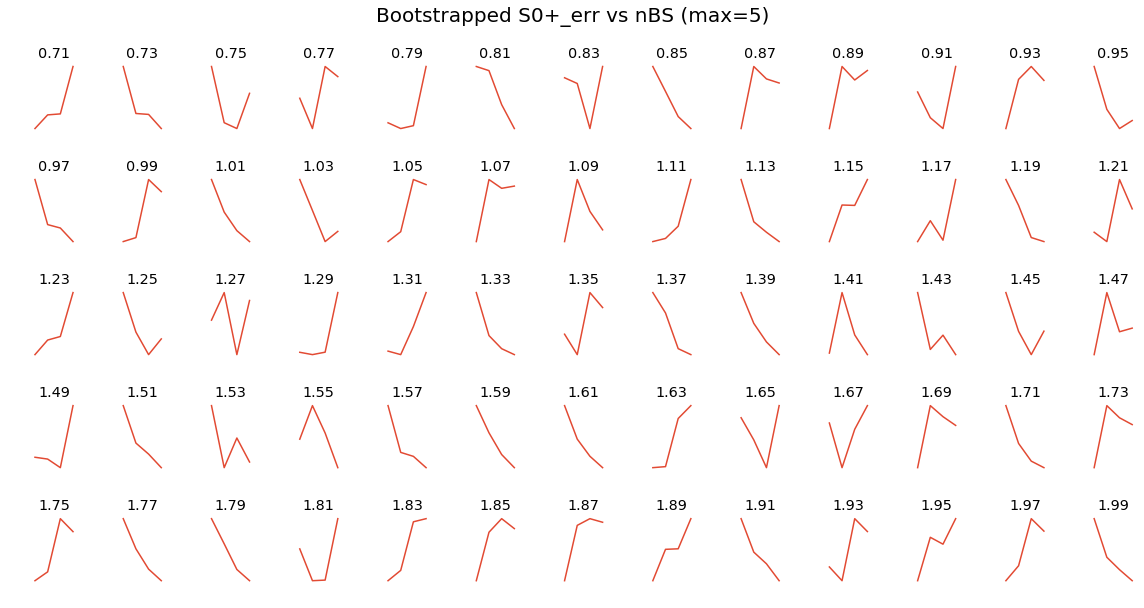

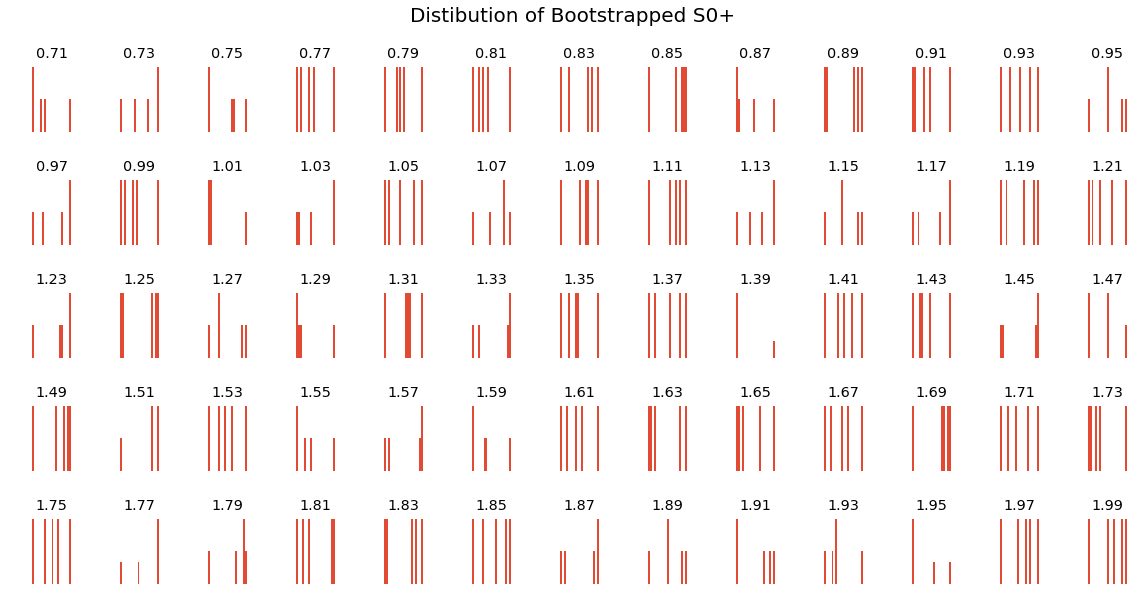

In [10]:
# Has bootstrapped errors stabilized and is std a good estimate of distributions spread?
allrunningBS=pd.concat(dataBS_running_acc,ignore_index=True)
nMasses=len(allrunningBS.mass.unique())


#################
# So what does this plot tell us? 
# We are looking for a plateau so 
# we know the std has stabilized
#################

col="S0+_err"
fig,axes=plt.subplots(5,13,figsize=(16,8))
fig.suptitle("Bootstrapped "+col+" vs nBS (max="+str(nBS)+")",size=20,y=1.05)
axes=axes.flatten()
for imass, mass in enumerate(allrunningBS.mass.unique()):
    df=allrunningBS[allrunningBS.mass==mass]
    axes[imass].plot(df.seed,df[col])
    axes[imass].axis('off')
    axes[imass].set_title(mass)
plt.tight_layout()

#################
# What are we looking for here?
# We are looking to see if std is 
# a good measure of the spread of 
# the distribution. It is if it
# looks ~ Gaus.
#################

col="S0+"
fig,axes=plt.subplots(5,13,figsize=(16,8))
fig.suptitle("Distibution of Bootstrapped "+col,size=20,y=1.05)
axes=axes.flatten()
for imass, mass in enumerate(dataBS.mass):
    df=dataBS_all_acc[dataBS_all_acc.mass==mass]
    axes[imass].hist(df[col],bins=20)
    axes[imass].axis('off')
    axes[imass].set_title(mass)
plt.tight_layout()

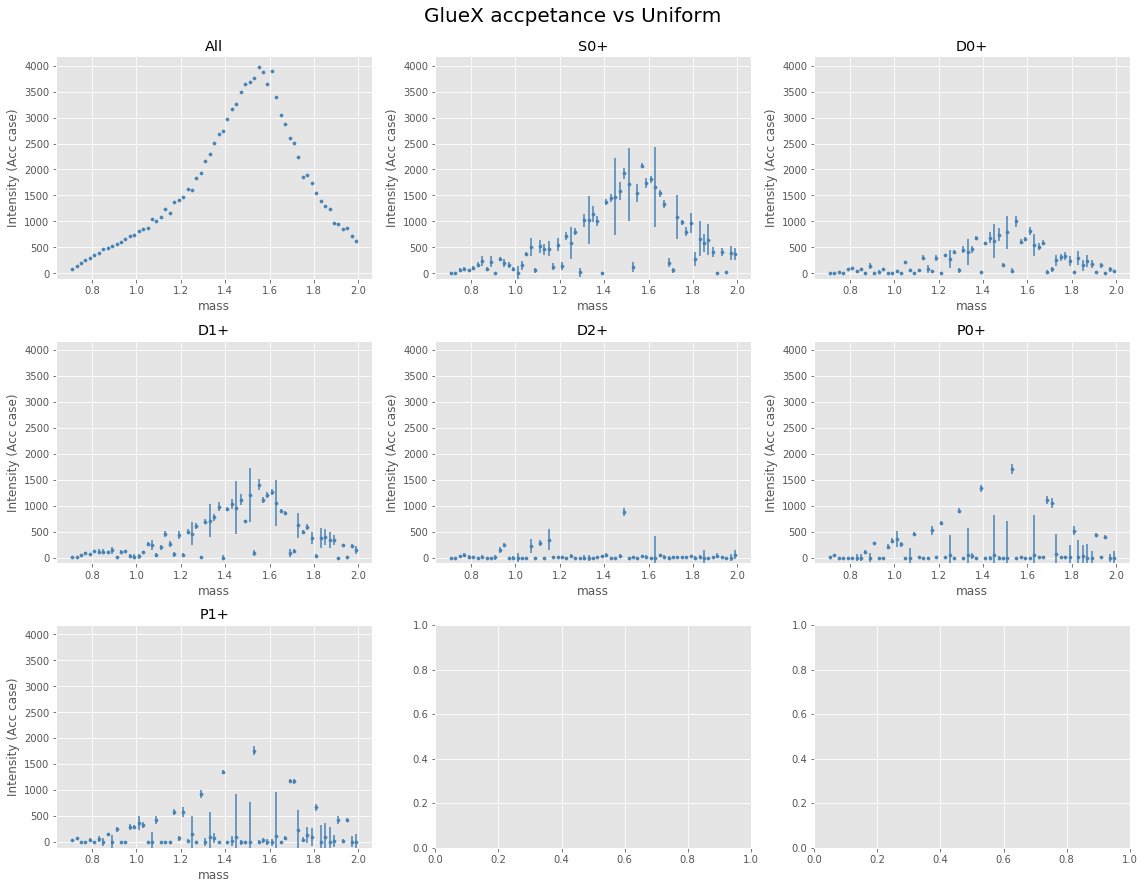

In [12]:
### SETUP THINGS FOR THE FIGURES
color_uni="steelblue"
color_acc="indianred"
size=10
label_acc="Gluex Acceptance"
label_uni="Uniform Acceptance"
legend_loc=(1.6,)
fig,axes=plt.subplots(3,3,figsize=(16,12))
axes=axes.flatten()
fig.suptitle("GlueX accpetance vs Uniform", y=1.025,size=20)
twinaxes=[]

## PLOT THE AMPLITUDES WITH THEIR BOOTSTRAPPED ERRORS
data_acc.plot("mass","all",yerr="all_err",kind="scatter",ax=axes[0],c=color_uni,s=size)#,sharey=True)
axes[0].set_ylabel("Intensity (Acc case)")
axes[0].set_title("All")
# intermediateAxis=axes[0].twinx()
# data_uni.plot("mass","all",yerr="all_err",kind="scatter",ax=intermediateAxis,c=color_acc,#sharey=True,
#               s=size,label=label_uni)
# intermediateAxis.grid(False) # need to put these after df.plot since it will get overwritten
# intermediateAxis.set_ylabel("")
# twinaxes.append(intermediateAxis)

limits=axes[0].get_ylim()
# limits1=intermediateAxis.get_ylim()
for iamp,amp in enumerate(amps):
    data_acc.plot("mass",amp,yerr=amp+"_err",kind="scatter",ax=axes[iamp+1],c=color_uni,s=size)
    axes[iamp+1].set_ylim(limits)
    axes[iamp+1].set_ylabel("Intensity (Acc case)")
    axes[iamp+1].set_title(amp)
#     intermediateAxis=axes[iamp+1].twinx()
#     intermediateAxis.set_ylim(limits1)
#     data_uni.plot("mass",amp,yerr=amp+"_err",kind="scatter",ax=intermediateAxis,c=color_acc,s=size,label=label_uni)
#     intermediateAxis.grid(None)
#     intermediateAxis.set_ylabel("")
#     twinaxes.append(intermediateAxis)
    
plt.tight_layout()

## What does the fit results look like using the thrown values

In [61]:
# ## LOAD THE ACC DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
# folderName="plot_etapi_delta_results_thrown_a0a2a2pi1_gluexAcc"
# data_acc_thrown=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
# data_acc_thrown=data_acc_thrown.drop(data_acc_thrown.shape[1]-1,axis=1) # delete trailing tabbed column
# data_acc_thrown.columns = columns

# ## LOAD THE UNIFORM ACCEPTANCE DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
# folderName="plot_etapi_delta_results_thrown_a0a2a2pi1_uniform"
# data_uni_thrown=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
# data_uni_thrown=data_uni_thrown.drop(data_uni_thrown.shape[1]-1,axis=1) # delete trailing tabbed column
# data_uni_thrown.columns = columns

In [62]:
# ### SETUP THINGS FOR THE FIGURES
# color_uni="steelblue"
# color_acc="indianred"
# size=10
# label_acc="Gluex Acceptance"
# label_uni="Uniform Acceptance"
# legend_loc=(1.6,)
# fig,axes=plt.subplots(3,3,figsize=(16,12))
# axes=axes.flatten()
# fig.suptitle("GlueX acceptance vs Uniform", y=1.025,size=20)
# twinaxes=[]

# ## PLOT THE AMPLITUDES WITH THEIR BOOTSTRAPPED ERRORS
# data_uni_thrown.plot("mass","all",kind="scatter",sharey=True,ax=axes[0],c=color_uni,s=size)
# axes[0].set_ylabel("Intensity")
# axes[0].set_title("All")
# intermediateAxis=axes[0].twinx()
# data_acc_thrown.plot("mass","all",kind="scatter",sharey=True,ax=intermediateAxis,c=color_acc,
#               s=size,label=label_acc)
# intermediateAxis.grid(False) # need to put these after df.plot since it will get overwritten
# intermediateAxis.set_ylabel("")
# twinaxes.append(intermediateAxis)

# limits=axes[0].get_ylim()
# limits1=intermediateAxis.get_ylim()
# for iamp,amp in enumerate(amps):
#     data_uni_thrown.plot("mass",amp,kind="scatter",ax=axes[iamp+1],c=color_uni,s=size)
#     axes[iamp+1].set_ylim(limits)
#     axes[iamp+1].set_ylabel("Intensity")
#     axes[iamp+1].set_title(amp)
#     intermediateAxis=axes[iamp+1].twinx()
#     intermediateAxis.set_ylim(limits1)
#     data_acc_thrown.plot("mass",amp,kind="scatter",ax=intermediateAxis,c=color_acc,s=size,label=label_acc)
#     intermediateAxis.grid(None)
#     intermediateAxis.set_ylabel("")
#     twinaxes.append(intermediateAxis)
    
# plt.tight_layout()

## Checking Thrown vs Reconstructed+AcceptanceCorrected

In [63]:
# fig,ax=plt.subplots(1,1,figsize=(8,6))
# data_uni_thrown.plot(kind="scatter",x="mass",y="all",ax=ax,c='steelblue',label="Thrown")
# data_acc.plot(kind="scatter",x="mass",y="all",ax=ax,c='indianred',label="Reconstructed+\nAcceptanceCorrected")
# ax.legend(prop={"size":13})
# ax.set_title("a0(980), a2(1320), a2(1700), pi1(1600)")

## Correct polAngle vs incorrect polAngle

In [64]:
# ## LOAD THE ACC DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
# folderName="plot_etapi_delta_results_gluexAcc"
# data_acc=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
# data_acc=data_acc.drop(data_acc.shape[1]-1,axis=1) # delete trailing tabbed column
# data_acc.columns = columns
# dataBS, dataBS_running_acc, dataBS_all_acc, err_colNames = getBSerrors(folderName,nBS)
# data_acc[err_colNames]=dataBS

# ## LOAD THE UNIFORM ACCEPTANCE DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
# folderName="plot_etapi_delta_results_correctPolAngle"
# data_uni=pd.read_csv(folderName+"/plot_etapi_delta.out",delimiter='\t',header=None)
# data_uni=data_uni.drop(data_uni.shape[1]-1,axis=1) # delete trailing tabbed column
# data_uni.columns = columns
# dataBS, dataBS_running_uni, dataBS_all_uni, err_colNames = getBSerrors(folderName,nBS)
# data_uni[err_colNames]=dataBS

# ### SETUP THINGS FOR THE FIGURES
# color_uni="steelblue"
# color_acc="indianred"
# size=10
# label_acc="with incorrect PolAngle"
# label_uni="with correct PolAngle"
# legend_loc=(1.6,)
# fig,axes=plt.subplots(3,3,figsize=(16,12))
# axes=axes.flatten()
# fig.suptitle("Incorrect vs Correct polAngle", y=1.025,size=20)
# twinaxes=[]

# ## PLOT THE AMPLITUDES WITH THEIR BOOTSTRAPPED ERRORS
# data_uni.plot("mass","all",yerr="all_err",kind="scatter",ax=axes[0],c=color_uni,s=size)#,sharey=True)
# axes[0].set_ylabel("Intensity (Uniform case)")
# axes[0].set_title("All")
# intermediateAxis=axes[0].twinx()
# data_acc.plot("mass","all",yerr="all_err",kind="scatter",ax=intermediateAxis,c=color_acc,#sharey=True,
#               s=size,label=label_acc)
# intermediateAxis.grid(False) # need to put these after df.plot since it will get overwritten
# intermediateAxis.set_ylabel("")
# twinaxes.append(intermediateAxis)

# limits=axes[0].get_ylim()
# #limits1=intermediateAxis.get_ylim()
# for iamp,amp in enumerate(amps):
#     data_uni.plot("mass",amp,yerr=amp+"_err",kind="scatter",ax=axes[iamp+1],c=color_uni,s=size,alpha=0.5)
#     #axes[iamp+1].set_ylim(limits)
#     axes[iamp+1].set_ylabel("Intensity (Uniform case)")
#     axes[iamp+1].set_title(amp)
#     intermediateAxis=axes[iamp+1].twinx()
#     #intermediateAxis.set_ylim(limits1)
#     data_acc.plot("mass",amp,yerr=amp+"_err",kind="scatter",ax=intermediateAxis,c=color_acc,s=size,
#                   label=label_acc,alpha=0.5)
#     intermediateAxis.grid(None)
#     intermediateAxis.set_ylabel("")
#     twinaxes.append(intermediateAxis)
    
# plt.tight_layout()

## Moments

In [65]:
def extractBSerrs_mom(dataBS):
    dataBS=dataBS.drop("seed",axis=1)
    dataBS=dataBS.groupby("M").std().reset_index()
    dataBS.columns=[col+"_err" if col!="M" else col for col in dataBS.columns]
    return dataBS

def getBSerrors_mom(folderName,nBS):
    dataBSs=[]
    dataBS_running=[]
    for iSeed in range(nBS):
        dataBS=pd.read_csv(folderName+"/project_moments_polarized-seed"+str(iSeed)+".out", delimiter=' ')
        dataBS=dataBS[cols]
        dataBS["seed"]=iSeed
        dataBSs.append(dataBS)
        if iSeed>0: # cant calculate a std with 1 element when calculating sample std --- normalized by n-1
            tempDF=extractBSerrs_mom(pd.concat(dataBSs,ignore_index=True))
            tempDF["seed"]=iSeed
            dataBS_running.append(tempDF)
    dataBS_all=pd.concat(dataBSs,ignore_index=True)  
    dataBS=extractBSerrs_mom(dataBS_all)
    return dataBS, dataBS_running, dataBS_all

In [66]:
## LOAD THE UNIFORM ACCEPTANCE DATA AND DO THE BOOTSTRAPPING TO REPLACE THE GIVEN ERRS
folderName="plot_etapi_delta_results_onlypi1_gen/"
mom_data_acc=pd.read_csv(folderName+"/project_moments_polarized.out",delimiter=' ')
cols=["M"]
for col in mom_data_acc.columns:
    if col[0]=="H" and col[-7:]!="uncert." and col.find("3")==-1 and col.find("4")==-1:
        cols.append(col)
print(cols)
mom_data_acc=mom_data_acc[cols]
mom_dataBS_acc, mom_dataBS_running_acc, mom_dataBS_all_acc = getBSerrors_mom(folderName,nBS)
mom_data_acc=pd.concat([mom_data_acc,mom_dataBS_acc.drop("M",axis=1)],axis=1)

['M', 'H0_00', 'H1_00', 'H0_10', 'H1_10', 'H0_11', 'H1_11', 'H0_20', 'H1_20', 'H0_21', 'H1_21', 'H0_22', 'H1_22']


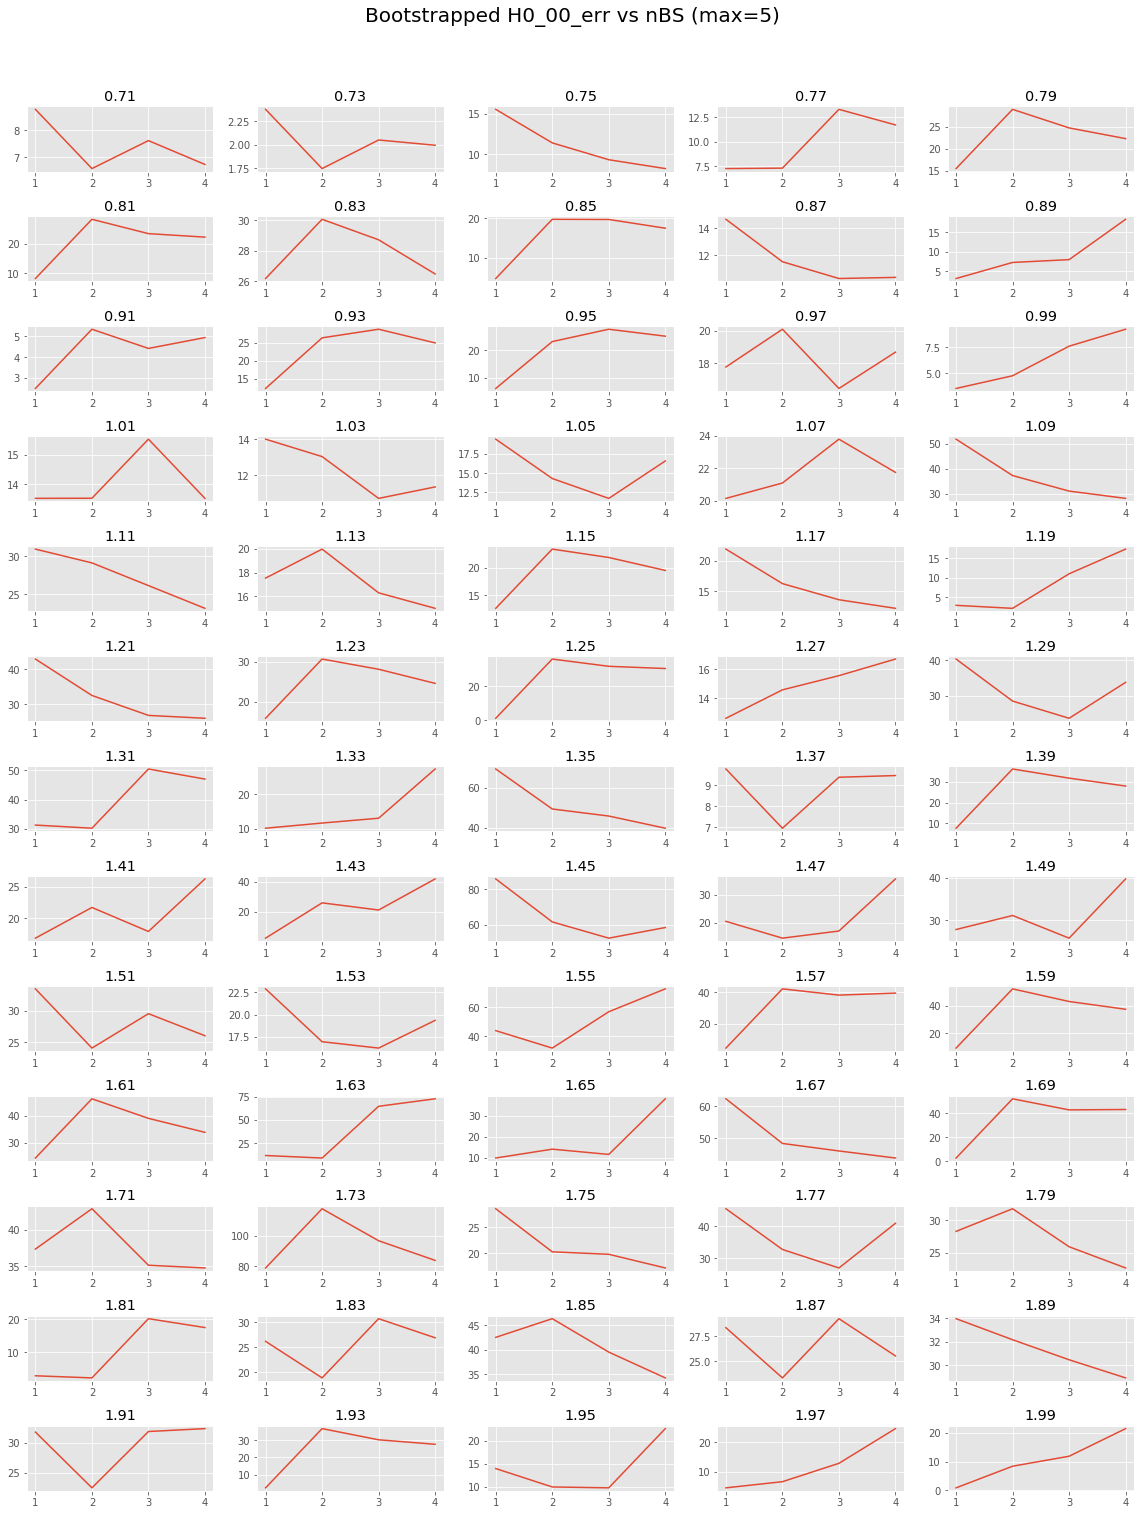

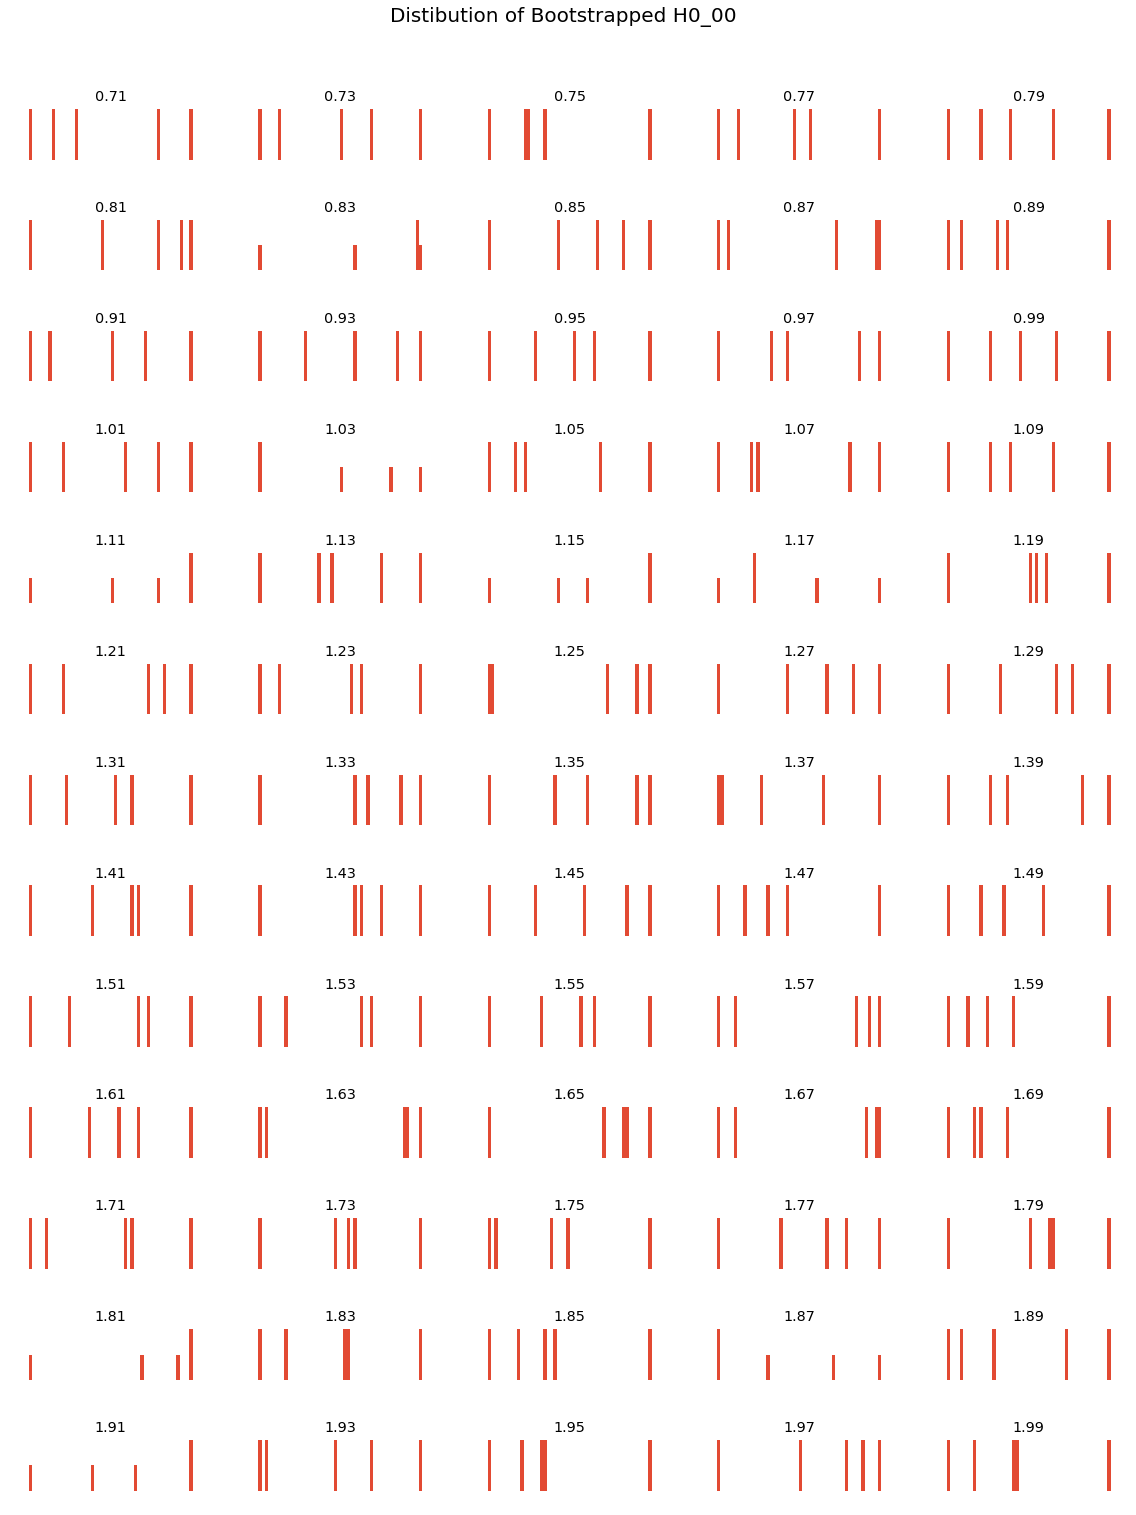

In [67]:
# Has bootstrapped errors stabilized and is std a good estimate of distributions spread?
allrunningBS=pd.concat(mom_dataBS_running_acc,ignore_index=True)
nMasses=len(allrunningBS.M.unique())


#################
# So what does this plot tell us? 
# We are looking for a plateau so 
# we know the std has stabilized
#################

col="H0_00_err"
fig,axes=plt.subplots(13,5,figsize=(16,20))
fig.suptitle("Bootstrapped "+col+" vs nBS (max="+str(nBS)+")",size=20,y=1.05)
axes=axes.flatten()
for imass, mass in enumerate(allrunningBS.M.unique()):
    df=allrunningBS[allrunningBS.M==mass]
    axes[imass].plot(df.seed,df[col])
    #axes[imass].axis('off')
    axes[imass].set_title(mass)
plt.tight_layout()

#################
# What are we looking for here?
# We are looking to see if std is 
# a good measure of the spread of 
# the distribution. It is if it
# looks ~ Gaus.
#################

col="H0_00"
fig,axes=plt.subplots(13,5,figsize=(16,20))
fig.suptitle("Distibution of Bootstrapped "+col,size=20,y=1.05)
axes=axes.flatten()
for imass, mass in enumerate(allrunningBS.M.unique()):
    df=mom_dataBS_all_acc[mom_dataBS_all_acc.M==mass]
    axes[imass].hist(df[col],bins=50)
    axes[imass].axis('off')
    axes[imass].set_title(mass)
plt.tight_layout()

In [68]:
moments=pd.read_csv("plot_etapi_delta_results_onlypi1/project_moments_polarized.out",delimiter=" ").dropna(axis=1)

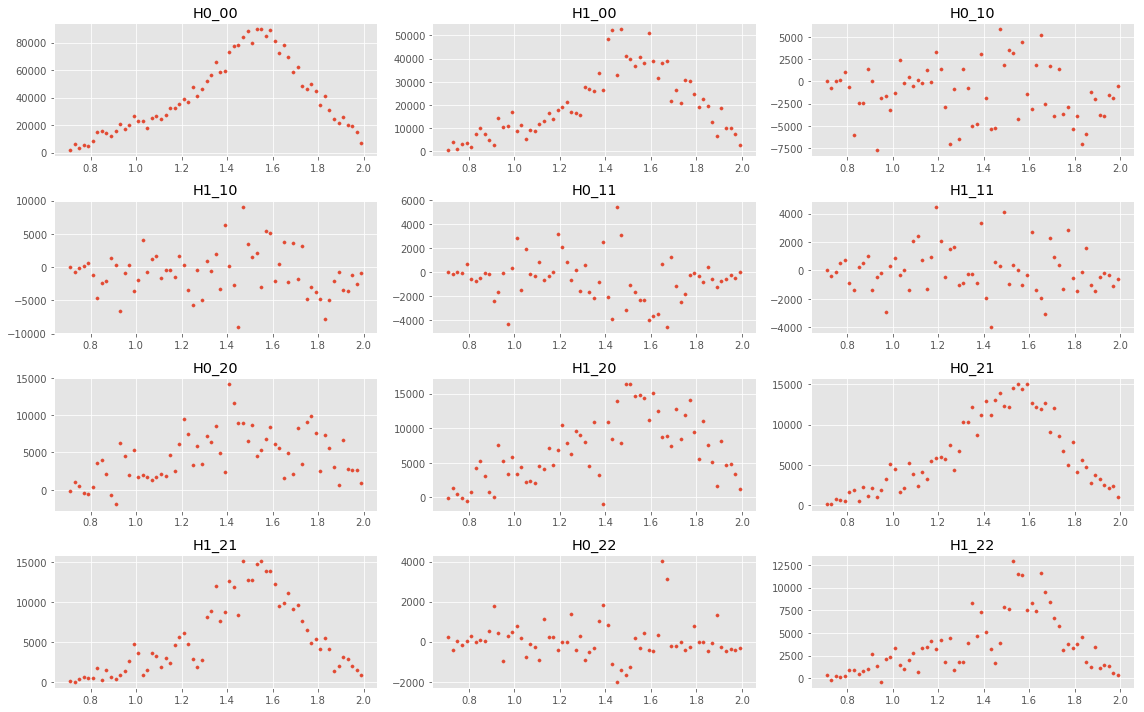

In [69]:
n=len(cols)-1
colsPerRow=3
nrows = n/colsPerRow if n%colsPerRow==0 else n/colsPerRow+1
fig,axes=plt.subplots(nrows,colsPerRow,figsize=(16,10))
axes=axes.flatten()
for iax,col in enumerate(cols[1:]):
    axes[iax].scatter(x=moments.M, y=moments[col],s=10)
    axes[iax].set_title(col)
plt.tight_layout()